In [8]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from LogisticRegression import LogisticRegression
from MultilayerPerceptron import MultilayerPerceptron
from plot_confusion_matrix import plot_confusion_matrix
from DecisionTree import DecisionTree
from preprocessing import *
metrics = DecisionTree()

In [9]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df = replace_zeros_with_median_considering_outcome(df, columns_to_fill=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [12]:
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=41)

In [16]:
LR_Model = LogisticRegression(learning_rate=0.0001, num_iterations=1000)
LR_Model.fit(X_train, y_train)
y_pred_lr = LR_Model.predict(X_test)

logistic_regression_confusuion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion matrix: \n{logistic_regression_confusuion_matrix}")
accuracy, precision, recall, f1 = metrics.metrics(logistic_regression_confusuion_matrix)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Confusion matrix: 
[[22 33]
 [15 84]]
Accuracy: 0.6883116883116883
Precision: 0.5945945945945946
Recall: 0.4
F1: 0.4782608695652174


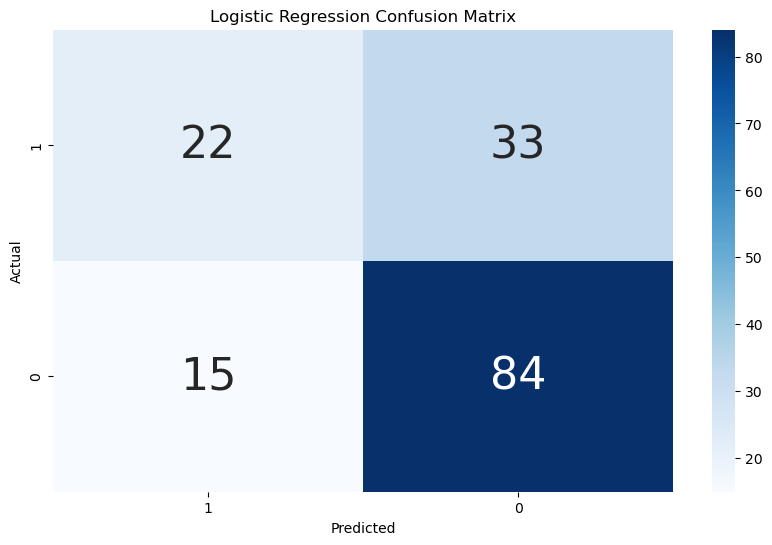

In [17]:
plot_confusion_matrix(logistic_regression_confusuion_matrix, title='Logistic Regression Confusion Matrix')

In [18]:
X_train_tensor = torch.from_numpy(X_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_train_tensor = torch.from_numpy(y_train).long()
y_test_tensor = torch.from_numpy(y_test).long()

Epoch 0, Training Loss: 11.528390884399414 - Training Accuracy: 0.653094470500946
Epoch 100, Training Loss: 0.5547487139701843 - Training Accuracy: 0.7263843417167664
Epoch 200, Training Loss: 0.4803708791732788 - Training Accuracy: 0.8061889410018921
Epoch 300, Training Loss: 0.3893167972564697 - Training Accuracy: 0.8420195579528809
Epoch 400, Training Loss: 0.34377774596214294 - Training Accuracy: 0.8501628637313843
Epoch 500, Training Loss: 0.3222459554672241 - Training Accuracy: 0.8680781722068787
Epoch 600, Training Loss: 0.31127437949180603 - Training Accuracy: 0.8827361464500427
Epoch 700, Training Loss: 0.3076494634151459 - Training Accuracy: 0.8680781722068787
Epoch 800, Training Loss: 0.319431871175766 - Training Accuracy: 0.8583061695098877
Epoch 900, Training Loss: 0.30624914169311523 - Training Accuracy: 0.8729641437530518


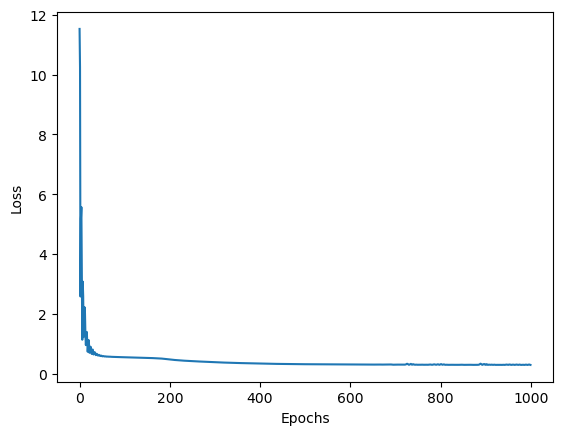

In [19]:
mlp = MultilayerPerceptron(input_size=X_train_tensor.shape[1], 
                           hidden_size=X_train_tensor.shape[1]*2, 
                           output_size=2, 
                           learning_rate=0.03,
                           activation="relu",
                           optimizer="adam",)
mlp.fit(X_train_tensor, y_train_tensor, epochs=1000)

In [20]:
y_pred_mlp = mlp.predict(X_test_tensor)
y_pred_mlp = torch.argmax(y_pred_mlp, dim=1)

mlp_confusion_matrix = metrics.confusion_matrix(y_test_tensor, y_pred_mlp)
print(f"Confusion matrix: \n{mlp_confusion_matrix}")
accuracy, precision, recall, f1 = metrics.metrics(mlp_confusion_matrix)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Confusion matrix: 
[[47  8]
 [13 86]]
Accuracy: 0.8636363636363636
Precision: 0.7833333333333333
Recall: 0.8545454545454545
F1: 0.817391304347826


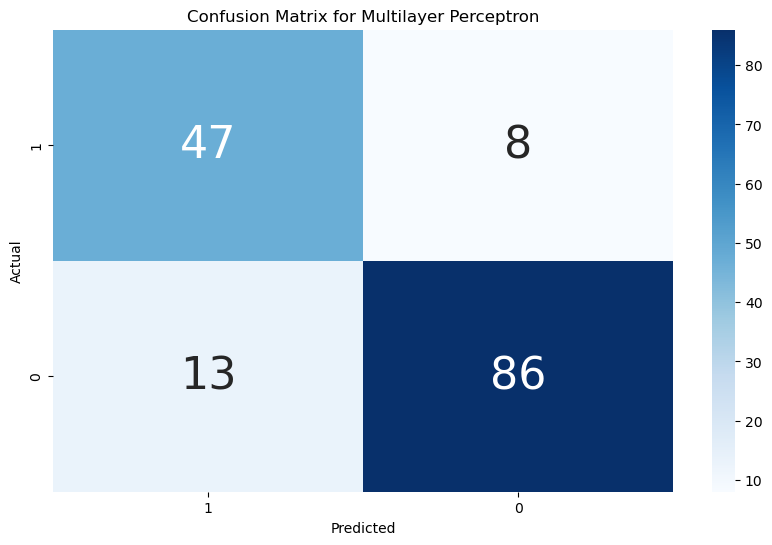

In [21]:
plot_confusion_matrix(mlp_confusion_matrix, "Confusion Matrix for Multilayer Perceptron")